## 1 - ImageFolder for Custom Datasets

In [8]:
import torch, torchvision
import matplotlib.pyplot as plt
import numpy as np

def torch_imshow(img):
    img = img.permute(1, 2, 0)
    plt.imshow(img.cpu().numpy())
    plt.show()

Making deep learning research for real world problems, rarely one uses common datasets such as CIFAR or MNIST. If one needs to build, say, a cat-dog classifier, a module that turns collected data to sampleable PyTorch dataset is needed. For image datasets, torchvision has `ImageFolder` module. It checks the root argument and looks for images in different directories (as classes) and turns the directory structure to a dataset that can be sampled. The resulting data structure is an image,label pair when sampled.  It also accepts `transform` argument as torchvision transforms. By default, it converts the images in directories to `PIL.Image` data structure. For this reason, a transform that creates torch tensors is needed, at least. You can also remove the `transform` argument and see the changes by sampling it.

In [9]:
# enter the root of your dataset as root argument. 
# e.g. '/datasets/cats_dogs/test_set/'
cats_dogs = torchvision.datasets.ImageFolder(root = '../datasets/cats_dogs/test_set', transform=torchvision.transforms.ToTensor())

In [10]:
print(cats_dogs)

Dataset ImageFolder
    Number of datapoints: 400
    Root location: ../datasets/cats_dogs/test_set
    StandardTransform
Transform: ToTensor()


In [11]:
# Sample an image, label pair from dataset
img_label_pair = cats_dogs[134]

In [12]:
print(type(img_label_pair))
print(len(img_label_pair))

<class 'tuple'>
2


In [13]:
img, label = img_label_pair

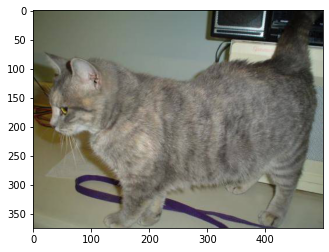

Shape: torch.Size([3, 375, 499])
Label: 0


In [14]:
torch_imshow(img)
print(f'Shape: {img.shape}')
print(f'Label: {label}')

In [15]:
loader = torch.utils.data.DataLoader(cats_dogs, batch_size=16, shuffle=True, num_workers=4)

Just like any other torch dataset, it can be used with `DataLoader` to have batched samples from the dataset. However, there is one problem when batching images. Let's check the dimensions of two different image from the dataset.

In [16]:
print(cats_dogs[123][0].shape)
print(cats_dogs[234][0].shape)

torch.Size([3, 289, 499])
torch.Size([3, 300, 399])


Since the dimensions of the data is not equal, torch dataloader naively tries to batch these instances and encounters an error even before executing the code in for loop.

In [17]:
for image, label in loader:
    #do something
    pass
    

RuntimeError: Caught RuntimeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/_utils/worker.py", line 185, in _worker_loop
    data = fetcher.fetch(index)
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/_utils/fetch.py", line 47, in fetch
    return self.collate_fn(data)
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/_utils/collate.py", line 84, in default_collate
    return [default_collate(samples) for samples in transposed]
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/_utils/collate.py", line 84, in <listcomp>
    return [default_collate(samples) for samples in transposed]
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/_utils/collate.py", line 55, in default_collate
    return torch.stack(batch, 0, out=out)
RuntimeError: stack expects each tensor to be equal size, but got [3, 251, 300] at entry 0 and [3, 374, 500] at entry 1


There are two solutions to this issue. First (and the advanced) one is to write custom batching fuction, which is not feasible most of the time. Second (and the simple) one is to resize all images to the same dimensions.